In [115]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [116]:
from sklearn.datasets import load_iris

iris = load_iris()

print(iris.keys())
print(iris["target_names"])
print(iris["feature_names"])
x = iris.data[2:4]
y = iris.target

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [117]:
from sklearn.model_selection import train_test_split
x,y = iris.data, iris.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=31)

df = pd.DataFrame(
    data = np.c_[x,y],
    columns=iris['feature_names']+['target'])
df.sample(frac=0.1)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
42,4.4,3.2,1.3,0.2,0.0
45,4.8,3.0,1.4,0.3,0.0
68,6.2,2.2,4.5,1.5,1.0
74,6.4,2.9,4.3,1.3,1.0
90,5.5,2.6,4.4,1.2,1.0
126,6.2,2.8,4.8,1.8,2.0
102,7.1,3.0,5.9,2.1,2.0
5,5.4,3.9,1.7,0.4,0.0
43,5.0,3.5,1.6,0.6,0.0
60,5.0,2.0,3.5,1.0,1.0


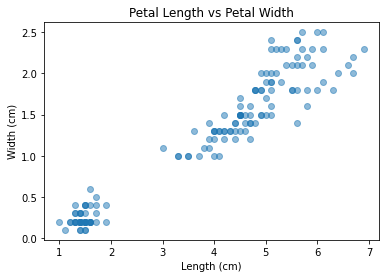

In [118]:
length = df.loc[:, 'petal length (cm)']
width = df.loc[:, 'petal width (cm)']

plt.scatter(length,width, alpha=0.5)
plt.title("Petal Length vs Petal Width")
plt.xlabel("Length (cm)")
plt.ylabel("Width (cm)")

plt.show()

In [119]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=6)

classifier = classifier.fit(x_train,y_train)

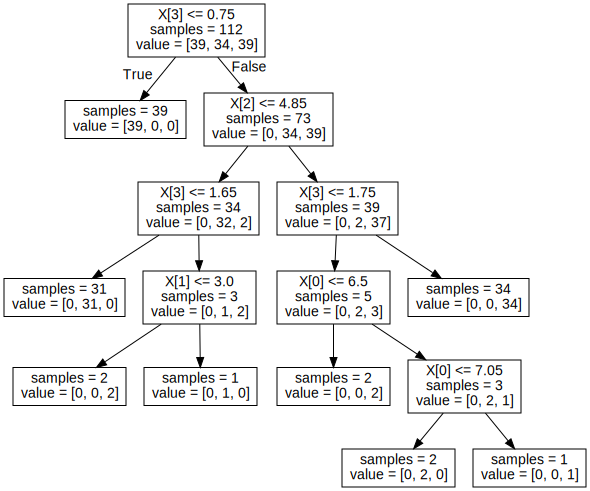

In [120]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(classifier, out_file=None, impurity=False)
graph = graphviz.Source(dot_data)
graph


[1 2 0 1 2 0 2 1 0 0 2 1 2 0 2 2 2 1 2 0 2 2 0 2 1 0 1 1 1 1 0 0 1 1 1 0 1
 2]
0.9473684210526315


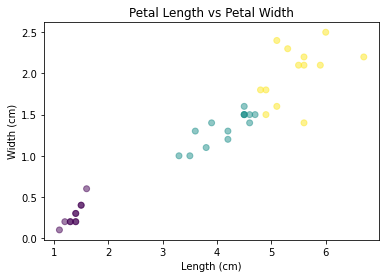

In [121]:
y_predict = classifier.predict(x_test)
print(y_predict)
accuracy = classifier.score(x_test, y_test)
print(accuracy)
length = x_test[:, 2]
width = x_test[:, 3]

plt.scatter(length,width, c=y_predict, alpha=0.5)
plt.title("Petal Length vs Petal Width")
plt.xlabel("Length (cm)")
plt.ylabel("Width (cm)")

plt.show()